<center><b>© Content is made available under the CC-BY-NC-ND 4.0 license. Christian Lopez, lopezbec@lafayette.edu<center>


<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/lopezbec/intro_python_notebooks/blob/master/Softmax_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
         </table>
          <br><br></br> 

# Softmax and Early Stopping Implementation

In this assigment you will implement Batch Gradient Descent with early stopping for Softmax Regression (without using Scikit-Learn)

### Setup

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

import time 

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Batch Gradient Descent with early stopping for Softmax Regression
(without using Scikit-Learn)

Let's start by loading the data. We will use the Iris dataset.

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

We need to add the bias term for every instance ($x_0 = 1$):

In [ ]:
X_with_bias = np.c_[np.ones([len(X), 1]), X]

And let's set the random seed so the output of this exercise solution is reproducible:

In [ ]:
np.random.seed(2042)

The easiest option to split the dataset into a training set, a validation set and a test set would be to use Scikit-Learn's `train_test_split()` function, but the point of this exercise is to try understand the algorithms by implementing them manually. So here is one possible implementation:

In [ ]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

The targets are currently class indices (0, 1 or 2), but we need target class probabilities to train the Softmax Regression model. Each instance will have target class probabilities equal to 0.0 for all classes except for the target class which will have a probability of 1.0 (in other words, the vector of class probabilities for ay given instance is a one-hot vector). Let's write a small function to convert the vector of class indices into a matrix containing a one-hot vector for each instance:

In [ ]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

Let's test this function on the first 10 instances:

In [ ]:
y_train[:10]

array([0, 1, 2, 1, 1, 0, 1, 1, 1, 0])

In [ ]:
to_one_hot(y_train[:10])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

Looks good, so let's create the target class probabilities matrix for the training set and the test set:

In [ ]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

Now let's implement the Softmax function. Recall that it is defined by the following equation:

$\sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}$

*Be advise when using `np.sum` which axis you are summing

In [ ]:
def softmax(logits):
    """
    Computes the Softmax function. The output is the probability 
    that the instance belongs to class k. 
    Parameters
    ----------
    Logists : array_like
        The Softmax score (m x k).
    
    Returns
    -------
    Softmax probability : array_like
    Probability that the instance belongs to class k (m x k).

    Instructions
    ------------
    Remember that you can use np.sum to calculate the 
    sum by colums or by rows.
    """

    ###========== START CODE HERE=========== ### (≈ 2 lines of code)



    ###========== END CODE HERE============= ### 

    return exps / exp_sums

We are almost ready to start training. Let's define the number of inputs and outputs:

In [ ]:
n_inputs = X_train.shape[1] # == 3 (2 features plus the bias term)
n_outputs = len(np.unique(y_train))   # == 3 (3 iris classes)

Also, lets test your softmax functions

In [ ]:
Theta = np.zeros( (n_inputs, n_outputs))
Y_proba = softmax(X_train.dot(Theta))
print(Y_proba[0,:])

[0.33333333 0.33333333 0.33333333]


**Expected Output:**


```
[0.33333333 0.33333333 0.33333333]
```



Now here comes the hardest part: training! Theoretically, it's simple: it's just a matter of translating the math equations into Python code. But in practice, it can be quite tricky: in particular, it's easy to mix up the order of the terms, or the indices. You can even end up with code that looks like it's working but is actually not computing exactly the right thing. When unsure, you should write down the shape of each term in the equation and make sure the corresponding terms in your code match closely. It can also help to evaluate each term independently and print them out. The good news it that you won't have to do this everyday, since all this is well implemented by Scikit-Learn, but it will help you understand what's going on under the hood.

So the equations we will need are the cost function:

$J(\mathbf{\Theta}) =
- \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}$

And the equation for the gradients:

$\nabla_{\mathbf{\theta}^{(k)}} \, J(\mathbf{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}$

Note that $\log\left(\hat{p}_k^{(i)}\right)$ may not be computable if $\hat{p}_k^{(i)} = 0$. So we will add a tiny value $\epsilon$ `epsilon`to $\log\left(\hat{p}_k^{(i)}\right)$ to avoid getting `nan` values.

In [ ]:
alpha = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.zeros( (n_inputs, n_outputs))
tic = time.process_time()
for iteration in range(n_iterations):
    ###========== START CODE HERE=========== ### (≈ 4 lines of code)







    ###========== END CODE HERE============= ### 

    if iteration % 1000 == 0:
        print(iteration, loss)
toc = time.process_time() 
print("Time to run:"+str(1000*(toc - tic)) + "ms")

0 1.098611988668155
1000 0.6528112953408097
2000 0.5258602243739757
3000 0.4613835308670922
4000 0.4203056454133403
5000 0.39063748789532077
Time to run:258.04154300000005ms


**Expected Output:**


```
0 1.098611988668155
1000 0.6528112953408097
2000 0.5258602243739757
3000 0.46138353086709233
4000 0.4203056454133403
5000 0.39063748789532077
```



And that's it! The Softmax model is trained. Let's look at the model parameters:

In [ ]:
Theta

array([[ 3.32338744, -0.55674245, -2.76664499],
       [-0.70418728,  0.44882349,  0.25536379],
       [-1.32887421, -0.34927308,  1.67814729]])

Let's make predictions for the validation set and check the accuracy score:

In [ ]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score_1 = np.mean(y_predict == y_valid)
accuracy_score_1

0.9666666666666667

**Expected Output:**


```
0.96667
```



Well, this model looks pretty good. For the sake of the exercise, let's add a bit of $\ell_2$ regularization. The following training code is similar to the one above, but the loss now has an additional $\ell_2$ penalty, and the gradients have the proper additional term (note that we don't regularize the first element of `Theta` since this corresponds to the bias term). Also, let's try increasing the learning rate `alpha`.

In [ ]:
alpha = 0.1  
lambda_ = 0.1 # regularization hyperparameter
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7


Theta = np.zeros( (n_inputs, n_outputs))
tic = time.process_time() 
for iteration in range(n_iterations):
    ###========== START CODE HERE=========== ### (≈ 7 lines of code)








    ###========== END CODE HERE============= ### 


    if iteration % 1000 == 0:
        print(iteration, loss)

toc = time.process_time() 
print("Time to run:"+str(1000*(toc - tic)) + "ms")

0 1.098611988668155
1000 0.5031061422252818
2000 0.4912201643938035
3000 0.48928488282746363
4000 0.48891453688933284
5000 0.48883973203963516
Time to run:493.21898100000004ms


In [ ]:
l2_loss

0.13527892688002827

**Expected Output:**


```
0 1.098611988668155
1000 0.5031061422252818
2000 0.4912201643938035
3000 0.48928488282746363
4000 0.4889145368893328
5000 0.48883973203963516
```



Because of the additional $\ell_2$ penalty, the loss seems greater than earlier, but perhaps this model will perform better? Let's find out:

In [ ]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score_l2 = np.mean(y_predict == y_valid)
accuracy_score_l2

1.0

**Expected Output:**


```
1.0
```



Perfect  accuracy! This was just because we got lucky with out Validation Dataset. If you change the randon seed you will see we would get a different value (due to the random partition of our dataset). However, if you do so, make sure to change it back to the original random seed value.

Now let's add early stopping with $\ell_2$ regularization. For this we just need to measure the loss on the validation set at every iteration and stop when the error starts growing. This has to be 

In [ ]:
eta = 0.1 
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter
best_loss = np.infty

Theta = np.zeros( (n_inputs, n_outputs))
tic = time.process_time() 
for iteration in range(n_iterations):
    ###========== START CODE HERE=========== ### (≈ 12 lines of code)














    ###========== END CODE HERE============= ### 

    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

toc = time.process_time() 
print("Time to run:"+str(1000*(toc - tic)) + "ms")

0 1.014404760552415
500 0.5647879014284448
1000 0.5413066198652687
1500 0.5349305990077056
2000 0.5330197060703865
2500 0.5325667694803817
2683 0.532545346810422
2684 0.5325453475163391 early stopping!
Time to run:385.50517100000013ms


**Expected Output:**


```
0 1.0221838565315413
1000 0.5519096548049391
2000 0.5398513388336552
3000 0.5369991641388994
4000 0.5361209481049856
5000 0.5357989673136738
```



In [ ]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score_estop = np.mean(y_predict == y_valid)
accuracy_score_estop

1.0

**Expected Output:**


```
1.0
```



Still the same accurracy , but faster.

Now let's plot the model's predictions on the whole dataset:

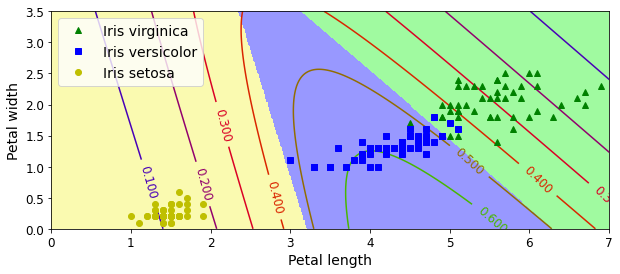

In [ ]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

And now let's measure the final model's accuracy on the test set:

In [ ]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)
accuracy_score_final = np.mean(y_predict == y_test)
accuracy_score_final

0.9333333333333333

Our perfect model turns out to have slight imperfections. This variability is likely due to the very small size of the dataset: depending on how you sample the training set, validation set and the test set, you can get quite different results. Try changing the random seed and running the code again a few times, you will see that the results will vary.

###### **DO NOT DELETE NOR MODIFY THESE CODE CELLS**


In [ ]:
# # ###DO NOT DELETE NOR MODIFY THIS CODE CELL####
!wget https://raw.githubusercontent.com/lopezbec/intro_python_notebooks/main/GRADING_SoftM.py
from GRADING_SoftM import GRADING_SoftM


try:
    accuracy_score_1
except:
    accuracy_score_1=None
try:
    accuracy_score_l2
except:
    accuracy_score_l2=None
try:
    accuracy_score_estop
except:
    accuracy_score_estop=None
try:
    accuracy_score_final
except:
    accuracy_score_final=None

GRADING_SoftM(accuracy_score_1, accuracy_score_l2,accuracy_score_estop,accuracy_score_final)


--2023-02-09 16:23:23--  https://raw.githubusercontent.com/lopezbec/intro_python_notebooks/main/GRADING_SoftM.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 869 [text/plain]
Saving to: ‘GRADING_SoftM.py’

GRADING_SoftM.py    100%[===================>]     869  --.-KB/s    in 0s      

2023-02-09 16:23:24 (44.7 MB/s) - ‘GRADING_SoftM.py’ saved [869/869]

accuracy_score_1 : False
accuracy_score_l2 : True
accuracy_score_estop : True
accuracy_score_final : True
